In [1]:
# See benchmark_consts.rs
N_MESSAGES_PER_THREAD = 2 << 15

import numpy as np
import matplotlib.pyplot as plt

In [2]:
thread_counts = [1, 2, 4, 8, 16, 32]


def to_ns(s: str) -> float:
    v = float(s[:-2])
    suffix = s[-2:]
    if suffix == "ns":
        v *= 1
    elif suffix == "μs":
        v *= 1000
    elif suffix == "ms":
        v *= 1000 * 1000
    else:
        v = float(s[:-1])
        v *= 1000 * 1000 * 1000
    return v


mpmc_oq_produce_tp = []
rigtorp_produce_tp = []
mpmc_oq_produce_tp_err = []
rigtorp_produce_tp_err = []

for tc in thread_counts:
    def get_values_from_file(f):
        values = [
            to_ns(line.split()[-1])
            for line in f.readlines()
            if line.startswith("[producer")
        ]
        # print(values, tc)
        # assert len(values) == tc
        return values
    mpmc = []
    rigtorp = []
    for r in range(1):
        with open(f"mpmc_oq_produce_bench_throughput_{tc}_run_{r}.log") as f:
            mpmc+= get_values_from_file(f)
        with open(f"rigtorp_produce_bench_throughput_{tc}_run_{r}.log") as f:
            rigtorp+=get_values_from_file(f)
    mpmc_oq_produce_tp.append(np.mean(mpmc))
    mpmc_oq_produce_tp_err.append(np.std(mpmc))
    rigtorp_produce_tp.append(np.mean(rigtorp))
    rigtorp_produce_tp_err.append(np.std(rigtorp))
    


[np.float64(3513655.8820563746), np.float64(20061243.675824497), np.float64(38511963.70567934), np.float64(42443399.115651436), np.float64(194424877.2563733), np.float64(567770163.2899824)]
[np.float64(24283275.8), np.float64(64295201.7), np.float64(93939460.4), np.float64(312260482.85), np.float64(1214675804.475), np.float64(2658925126.1875)]


<Figure size 640x480 with 0 Axes>

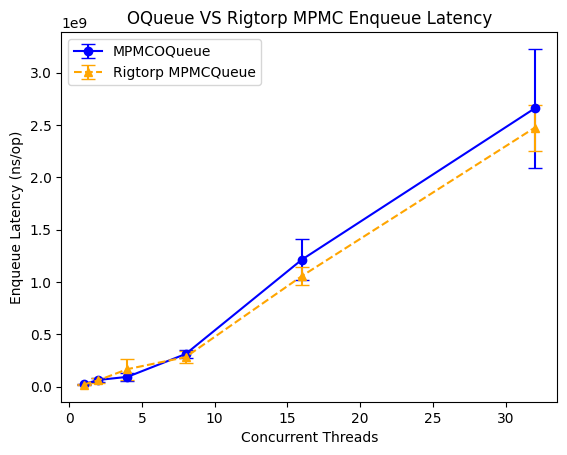

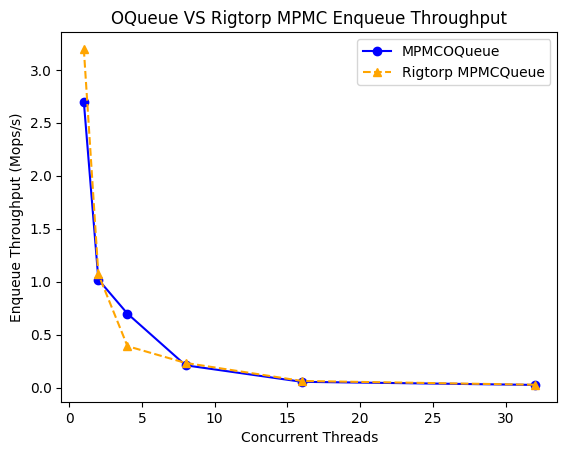

In [3]:
print(mpmc_oq_produce_tp_err)
print(mpmc_oq_produce_tp)
def t(v):
    return N_MESSAGES_PER_THREAD * (10**3) / v
fig = plt.figure()
m = [t(v) for v in mpmc_oq_produce_tp]
r = [t(v) for v in rigtorp_produce_tp]


fig = plt.figure()

plt.errorbar(thread_counts, mpmc_oq_produce_tp, yerr=mpmc_oq_produce_tp_err, capsize=5, marker='o', label="MPMCOQueue", color="blue")
plt.errorbar(thread_counts, rigtorp_produce_tp, yerr=rigtorp_produce_tp_err, capsize=5, marker='^', linestyle='--', label="Rigtorp MPMCQueue", color="orange")
plt.legend()
plt.ylabel("Enqueue Latency (ns/op)")
# plt.yscale("log")
plt.xlabel("Concurrent Threads")
plt.title("OQueue VS Rigtorp MPMC Enqueue Latency")
plt.show()

plt.errorbar(thread_counts, m, marker='o', label="MPMCOQueue", color="blue")
plt.errorbar(thread_counts, r, marker='^', linestyle='--', label="Rigtorp MPMCQueue", color="orange")
plt.legend()
plt.ylabel("Enqueue Throughput (Mops/s)")
# plt.yscale("log")
plt.xlabel("Concurrent Threads")
plt.title("OQueue VS Rigtorp MPMC Enqueue Throughput")
plt.savefig('prodthroughput.svg')
plt.show()


In [30]:
for i in range(len(mpmc_oq_produce_tp)):
    print(mpmc_oq_produce_tp[i]/rigtorp_produce_tp[i])

1.1846582416630091
1.04922877349616
0.5602323442273197
1.1058156935134222
1.148126549091535
1.074614804388883


In [13]:
mpmc_oq_consume_tp = []
rigtorp_consume_tp = []
mpmc_oq_consume_tp_err = []
rigtorp_consume_tp_err = []

for tc in thread_counts:
    def get_values_from_file(f):
        values = [
            to_ns(line.split()[-1])
            for line in f.readlines()
            if line.startswith("[consumer")
        ]
        return values
    mpmc = []
    rigtorp = []
    for r in range(1):
        with open(f"mpmc_oq_consume_bench_throughput_{tc}_run_{r}.log") as f:
            mpmc += get_values_from_file(f)
        with open(f"rigtorp_consume_bench_throughput_{tc}_run_{r}.log") as f:
            rigtorp += get_values_from_file(f)
    mpmc_oq_consume_tp.append(np.mean(mpmc))
    mpmc_oq_consume_tp_err.append(np.std(mpmc))
    rigtorp_consume_tp.append(np.mean(rigtorp))
    rigtorp_consume_tp_err.append(np.std(rigtorp))

    print(tc)
    print("  ", np.mean(mpmc), np.std(mpmc))
    


1
   5934600.4 67325.0378168479
2
   12765367.1 2543666.4909026674
4
   30969440.85 3452891.521541348
8
   93887891.275 65718875.26500749
16
   320866581.7875 462828407.9228031
32
   712548205.875 1197996914.9965575


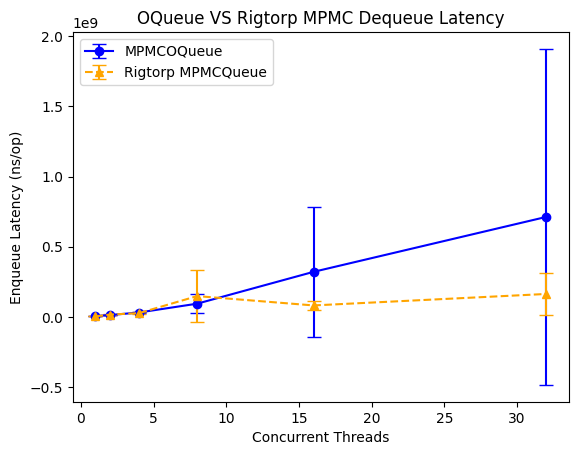

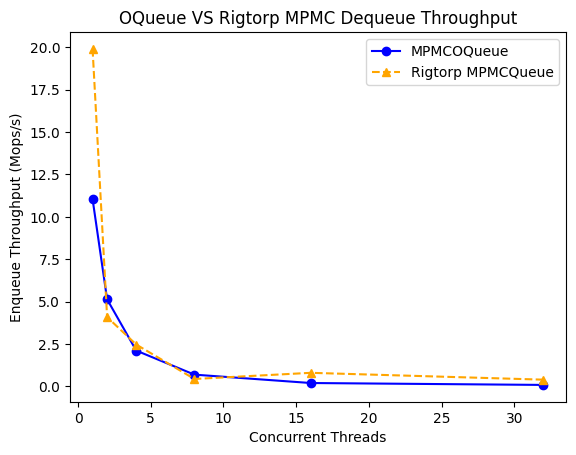

[np.float64(5934600.4), np.float64(12765367.1), np.float64(30969440.85), np.float64(93887891.275), np.float64(320866581.7875), np.float64(712548205.875)]
[np.float64(67325.0378168479), np.float64(2543666.4909026674), np.float64(3452891.521541348), np.float64(65718875.26500749), np.float64(462828407.9228031), np.float64(1197996914.9965575)]


In [14]:
def t(v):
    return N_MESSAGES_PER_THREAD * (10**3) / v

fig = plt.figure()
plt.errorbar(thread_counts, mpmc_oq_consume_tp, yerr=mpmc_oq_consume_tp_err, capsize=5, marker='o', label="MPMCOQueue", color="blue")
plt.errorbar(thread_counts, rigtorp_consume_tp, yerr=rigtorp_consume_tp_err, capsize=5, marker='^', linestyle='--', label="Rigtorp MPMCQueue", color="orange")
plt.legend()
plt.ylabel("Enqueue Latency (ns/op)")
# plt.yscale("log")
plt.xlabel("Concurrent Threads")
plt.title("OQueue VS Rigtorp MPMC Dequeue Latency")
plt.show()

fig = plt.figure()
m = [t(v) for v in mpmc_oq_consume_tp]
r = [t(v) for v in rigtorp_consume_tp]
plt.errorbar(thread_counts, m, marker='o', label="MPMCOQueue", color="blue")
plt.errorbar(thread_counts, r, marker='^', linestyle='--', label="Rigtorp MPMCQueue", color="orange")
plt.legend()
plt.ylabel("Enqueue Throughput (Mops/s)")
# plt.yscale("log")
plt.xlabel("Concurrent Threads")
plt.title("OQueue VS Rigtorp MPMC Dequeue Throughput")
plt.savefig('consumethroughput.svg')
plt.show()

print(mpmc_oq_consume_tp)
print(mpmc_oq_consume_tp_err)


In [15]:
for i in range(len(mpmc_oq_consume_tp)):
    print(100*t(mpmc_oq_consume_tp[i])/t(rigtorp_consume_tp[i]))

55.51073666223592
125.54657358815793
85.59891128935251
157.5737715385173
25.364936645661803
22.906159249719973


In [16]:
mpmc_oq_mixed_tp = []
rigtorp_mixed_tp = []
mpmc_oq_mixed_tp_err = []
rigtorp_mixed_tp_err = []

for tc in thread_counts[1:]:
    def get_values_from_file(f):
        values = [
            to_ns(line.split()[-1])
            for line in f.readlines()
            if line.startswith("[total")
        ]
        # assert len(values) == tc
        return values
    mpmc = []
    rigtorp = []
    for r in range(1):
        with open(f"mpmc_oq_mixed_bench_throughput_{tc}_run_{r}.log") as f:
            mpmc += get_values_from_file(f)
        with open(f"rigtorp_mixed_bench_throughput_{tc}_run_{r}.log") as f:
            rigtorp += get_values_from_file(f)
    mpmc_oq_mixed_tp.append(np.max(mpmc))
    mpmc_oq_mixed_tp_err.append(np.std(mpmc))
    rigtorp_mixed_tp.append(np.max(rigtorp))
    rigtorp_mixed_tp_err.append(np.std(rigtorp))
    


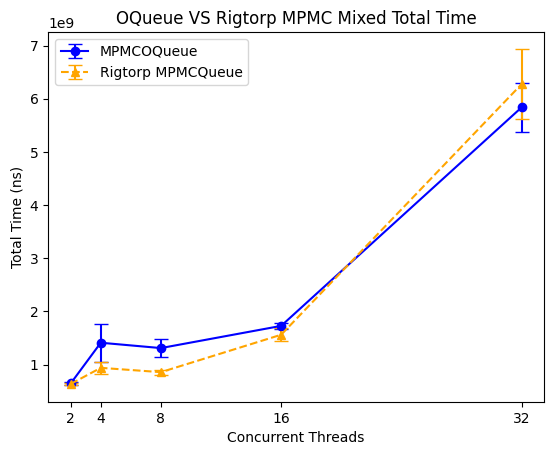

In [17]:
fig = plt.figure()
plt.errorbar(thread_counts[1:], mpmc_oq_mixed_tp, yerr=mpmc_oq_mixed_tp_err, capsize=5, marker='o', label="MPMCOQueue", color="blue")
plt.errorbar(thread_counts[1:], rigtorp_mixed_tp, yerr=rigtorp_mixed_tp_err, capsize=5, marker='^', linestyle='--', label="Rigtorp MPMCQueue", color="orange")
plt.legend()
plt.ylabel("Total Time (ns)")
# plt.yscale("log")
plt.xlabel("Concurrent Threads")
plt.title("OQueue VS Rigtorp MPMC Mixed Total Time")
plt.xticks(thread_counts[1:])
plt.savefig('mixedthroughput.svg')
plt.show()

In [14]:
for i in range(len(mpmc_oq_mixed_tp)):
    print(1 - mpmc_oq_mixed_tp[i]/rigtorp_mixed_tp[i])

-0.0152700514742663
-0.5027883024932582
-0.5282483418173978
-0.10669494286612635
0.0695590230174068


In [7]:
mpmc_oq_weak_tp = []
rigtorp_weak_tp = []
mpmc_oq_weak_tp_err = []
rigtorp_weak_tp_err = []

for tc in thread_counts[2:]:
    def get_values_from_file(f):
        values = [
            to_ns(line.split()[-1])
            for line in f.readlines()
            if line.startswith("[total")
        ]
        # assert len(values) == tc
        return values
    mpmc = []
    rigtorp = []
    for r in range(1):
        with open(f"mpmc_oq_weak_obs_bench_throughput_{tc}_run_{r}.log") as f:
            mpmc += get_values_from_file(f)
        with open(f"rigtorp_weak_obs_bench_throughput_{tc}_run_{r}.log") as f:
            rigtorp += get_values_from_file(f)
    mpmc_oq_weak_tp.append(np.max(mpmc))
    mpmc_oq_weak_tp_err.append(np.std(mpmc))
    rigtorp_weak_tp.append(np.max(rigtorp))
    rigtorp_weak_tp_err.append(np.std(rigtorp))
    


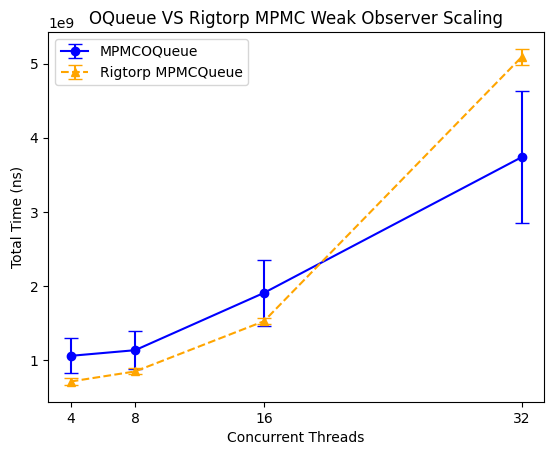

In [10]:
fig = plt.figure()
plt.errorbar(thread_counts[2:], mpmc_oq_weak_tp, yerr=mpmc_oq_weak_tp_err, capsize=5, marker='o', label="MPMCOQueue", color="blue")
plt.errorbar(thread_counts[2:], rigtorp_weak_tp, yerr=rigtorp_weak_tp_err, capsize=5, marker='^', linestyle='--', label="Rigtorp MPMCQueue", color="orange")
plt.legend()
plt.ylabel("Total Time (ns)")
# plt.yscale("log")
plt.xlabel("Concurrent Threads")
plt.title("OQueue VS Rigtorp MPMC Weak Observer Scaling")
plt.xticks(thread_counts[2:])
plt.savefig('weakthroughput.svg')
plt.show()